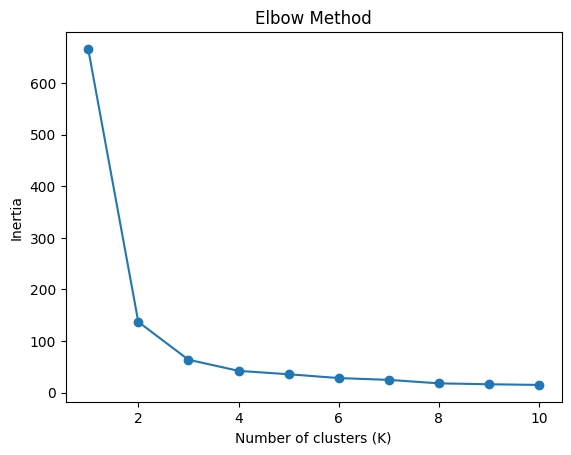

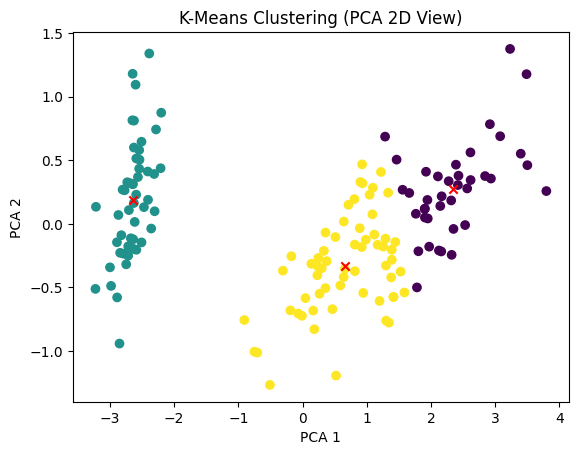

Silhouette Score: 0.60


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()


kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x')
plt.title('K-Means Clustering (PCA 2D View)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


score = silhouette_score(X_pca, cluster_labels)
print(f'Silhouette Score: {score:.2f}')
